# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
#write code here
data = pd.read_csv('data1.csv')
df = data.copy()

#### **Task 2: Display first five rows** 

In [3]:
#write code here
df.head(5)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [4]:
#write code here
df.drop('Unnamed: 0',axis=1,inplace=True)

#### **Task 4: Check the number of rows and columns**

In [5]:
#write code here
df.shape


(215909, 9)

#### **Task 5: Check data types of all columns**

In [6]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [7]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [8]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:** Origin,destination,start_date,end_date,train_type have NO Null Value.
Price,Train Class,Fare contain some null values.
MADRID has the highest Frequency in both Origin And Destination.
The majority of people travel by AVE train.
Turista has the highest freq in which people love to travel.


#### **Task 8: Check null values in dataset**

In [9]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [10]:
df['price'].isnull().sum()

13588

In [11]:
#Price depends on train type,train class and fare we cannot fill its value with mean() we have to take the mean of each category and then fill the NaN accordingly 
for train_type in df['train_type'].unique():
    for train_class in df['train_class'].unique():
        for fare in df['fare'].unique():
            df.loc[(df['train_type']==train_type)&(df['train_class']==train_class)&(df['fare']==fare)&(df['price'].isnull()),'price']=df.loc[(df['train_type']==train_type)&(df['train_class']==train_class)&(df['fare']==fare),'price'].mean()
            

In [12]:
# we have filled mostly of NaN values but their is still some NaN value remaining
df['price'].isnull().sum()

2205

In [13]:
df[df.price.isnull()]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
6606,2019-04-20 02:44:09,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,NaN,NaN,NaN
6826,2019-04-20 03:32:19,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,NaN,NaN,NaN
7244,2019-04-20 04:44:26,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,NaN,NaN,NaN
7524,2019-04-20 05:44:05,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,NaN,NaN,NaN
7591,2019-04-20 06:05:40,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
206554,2019-04-17 21:19:09,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,NaN,NaN,NaN
206895,2019-04-17 22:17:23,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,NaN,NaN,NaN
207073,2019-04-17 23:08:28,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,NaN,NaN,NaN
207140,2019-04-17 23:16:52,SEVILLA,MADRID,2019-06-02 20:36:00,2019-06-02 23:14:00,ALVIA,NaN,Turista Plus,Flexible


In [14]:
# In some data their is still some NaN which is due to train Class and Fare are Null know i replace other Null values in price column with its mean
#write code here
df.price.fillna(df.price.mean(),inplace=True)

In [15]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

In [16]:
df.price.describe()

count    215909.000000
mean         56.919485
std          25.032735
min          16.600000
25%          28.350000
50%          56.568509
75%          76.300000
max         206.800000
Name: price, dtype: float64

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [17]:
#write code here
print(df['fare'].isnull().sum(),df['train_class'].isnull().sum())


643 643


In [18]:
df.loc[(df.train_class.isnull())&(df.fare.isnull())]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
6606,2019-04-20 02:44:09,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,56.919485,NaN,NaN
6826,2019-04-20 03:32:19,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,56.919485,NaN,NaN
7244,2019-04-20 04:44:26,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,56.919485,NaN,NaN
7524,2019-04-20 05:44:05,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,56.919485,NaN,NaN
7591,2019-04-20 06:05:40,MADRID,BARCELONA,2019-06-01 20:30:00,2019-06-01 23:40:00,AVE,56.919485,NaN,NaN
...,...,...,...,...,...,...,...,...,...
206034,2019-04-17 19:32:49,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,56.919485,NaN,NaN
206353,2019-04-17 20:36:39,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,56.919485,NaN,NaN
206554,2019-04-17 21:19:09,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,56.919485,NaN,NaN
206895,2019-04-17 22:17:23,PONFERRADA,MADRID,2019-06-01 13:44:00,2019-06-01 21:48:00,LD-MD,56.919485,NaN,NaN


In [19]:
df.dropna(subset=['train_class', 'fare'], how='all', inplace=True)

In [20]:
df.loc[(df.train_class.isnull())&(df.fare.isnull())]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare


In [21]:
df.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 11: Drop 'insert_date'**

In [22]:
#write code here
df.drop('insert_date',axis=1,inplace=True)

**Check null values again in dataset**

In [23]:
#write code here
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


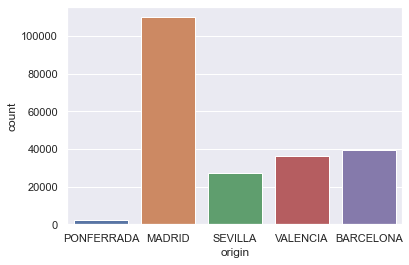

In [24]:
#write code here
sns.countplot(x=df.origin);

**Question: What insights do you get from the above plot?**

**Answer:** The graph shows that MADRID has the highest boarding and PONFERRADA has the lowest boarding rate.

#### **Task 13: Plot number of people for the destination stations**


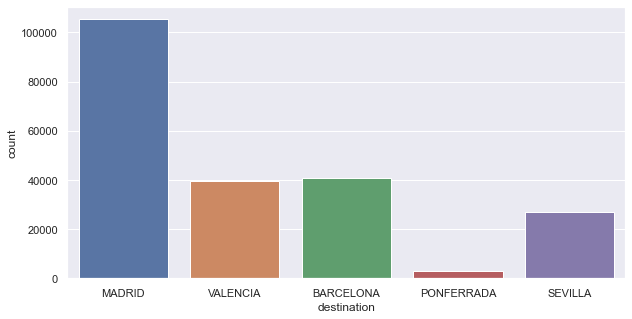

In [25]:
#write code here
plt.figure(figsize=(10,5))
sns.countplot(x=df.destination);

**Question: What insights do you get from the above graph?**

**Answer:** MADRID is the destination point of most the people

#### **Task 14: Plot different types of train that runs in Spain**


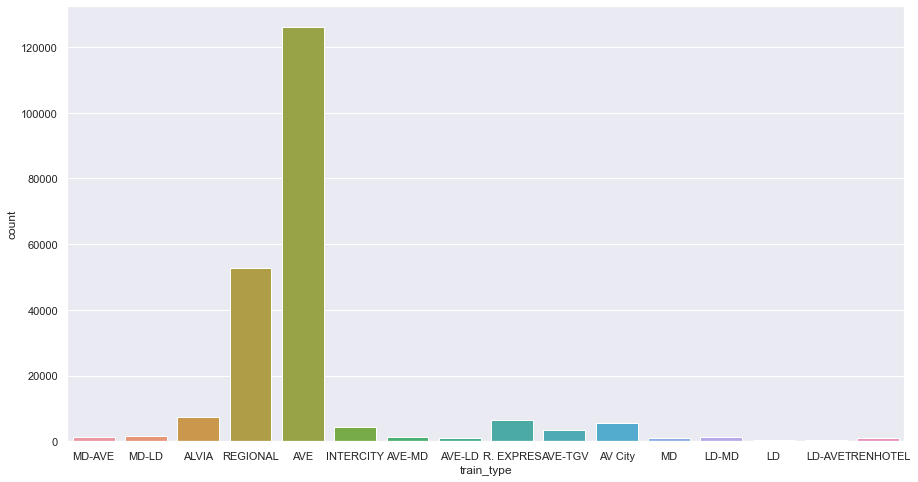

In [26]:
#write code here
plt.figure(figsize=(15,8))
sns.countplot(x=df.train_type);

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** AVE runs the maximum as compared to other trains


#### **Task 15: Plot number of trains of different class**


In [27]:
df.train_class.value_counts().reset_index()

,index,train_class
0,Turista,164016
1,Preferente,24476
2,Turista Plus,19922
3,Turista con enlace,6827
4,Cama Turista,25


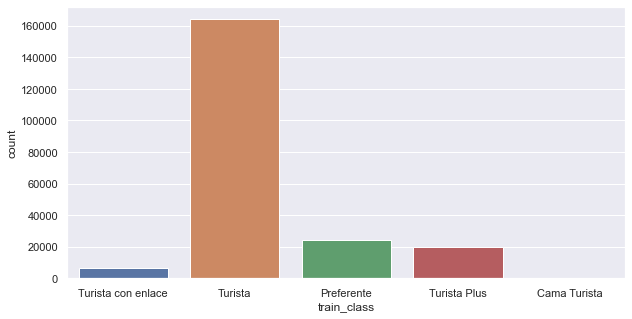

In [28]:
#write code here
plt.figure(figsize=(10,5))
sns.countplot(x=df.train_class);

**Question: Which the most common train class for traveling among people in general?**

**Answer:** Turista is the most common class among people


#### **Task 16: Plot number of tickets bought from each category**


In [29]:
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


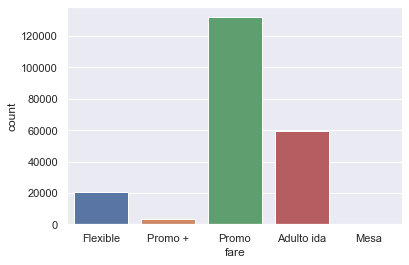

In [30]:
#write code here
sns.countplot(x=df.fare);

**Question: Which the most common tickets are bought?**

**Answer:** Most of the people bought tickets from Promo category

#### **Task 17: Plot distribution of the ticket prices**

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


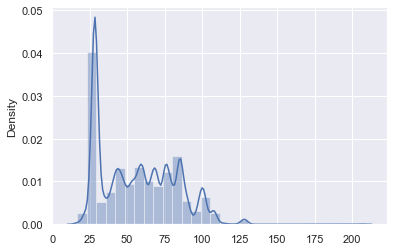

In [31]:
#write code here
sns.distplot(x=df.price,bins=30);

**Question: What readings can you get from the above plot?**

**Answer:** The graph shows that Most people travel within the price of 25-40    

###### **Task 18: Show train_class vs price through boxplot**

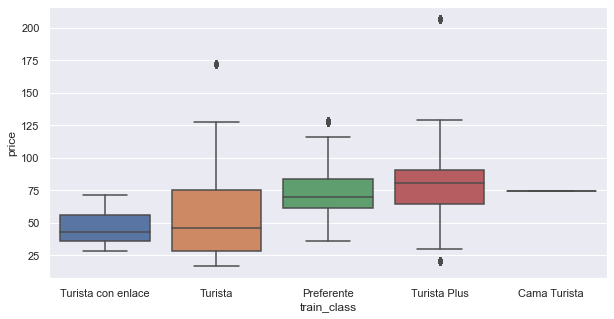

In [32]:
#write code here
plt.figure(figsize=(10,5))
sns.boxplot(x=df.train_class,y=df.price);

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:**In Turista plus class prices are higher as compared to others because its medain , lower and upper qurtile are much higher than others.

#### **Task 19: Show train_type vs price through boxplot**


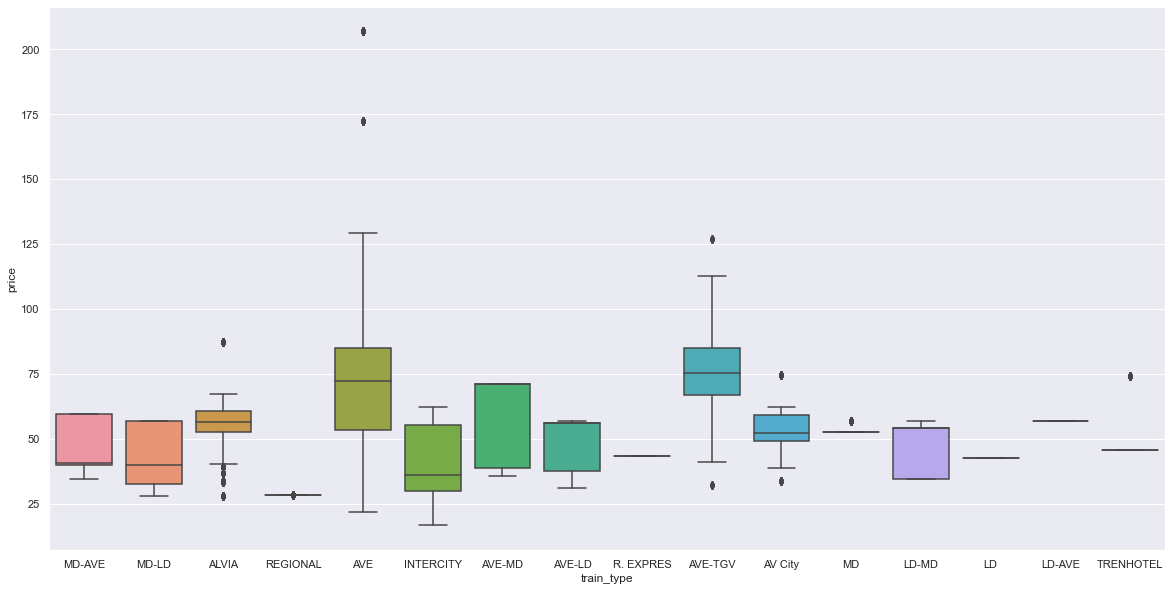

In [33]:
#write code here
plt.figure(figsize=(20,10))
sns.boxplot(x='train_type',y='price',data=df);

**Question: Which type of trains cost more as compared to others?**

**Answer:** Ave train cost more as compared to Others because its median,lower and upper quartile are higher than others


## Feature Engineering


In [34]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [35]:
#write code here
import datetime

In [36]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [37]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [38]:
#write code here
df.drop(['start_date','end_date'],axis=1,inplace=True)

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [39]:
df1=df[(df.origin=='MADRID')&(df.destination=='SEVILLA')]
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667
365,365,MADRID,SEVILLA,ALVIA,56.568509,Preferente,Promo,2.733333
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333
368,368,MADRID,SEVILLA,ALVIA,56.568509,Preferente,Promo,2.600000
...,...,...,...,...,...,...,...,...
215261,215904,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215262,215905,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.533333
215263,215906,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215264,215907,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.666667


#### Task 22: Make a plot for finding out travelling hours for each train type

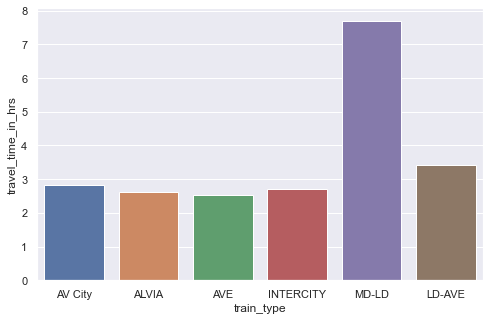

In [40]:
#write code here
%matplotlib inline

plt.figure(figsize=(8,5))
sns.barplot(x=df1.train_type,y=df1.travel_time_in_hrs);

#### **Task 23: Show train_type vs price through boxplot**


In [41]:
df1.train_type.value_counts()

AVE          19556
ALVIA         3435
AV City       2766
MD-LD          677
INTERCITY      520
LD-AVE           7
Name: train_type, dtype: int64

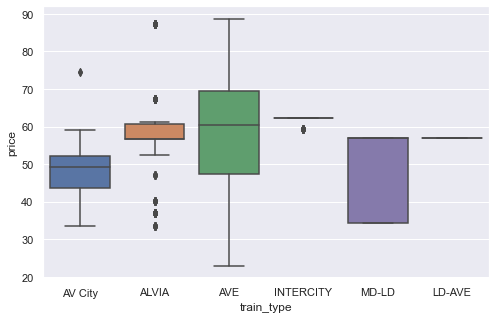

In [42]:
#write code here
plt.figure(figsize=(8,5))
sns.boxplot(x=df1.train_type,y=df1.price);

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [43]:
#write code here
df1 = df[(df.origin=='MADRID')&(df.destination=='BARCELONA')]
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
79,79,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
80,80,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
81,81,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
82,82,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
83,83,MADRID,BARCELONA,AVE,66.75,Turista,Promo,3.150000
...,...,...,...,...,...,...,...,...
215085,215728,MADRID,BARCELONA,AVE,80.15,Turista Plus,Promo,2.750000
215086,215729,MADRID,BARCELONA,AVE,98.00,Preferente,Promo,3.166667
215087,215730,MADRID,BARCELONA,AVE,69.80,Turista Plus,Promo,2.833333
215088,215731,MADRID,BARCELONA,AVE,58.15,Turista,Promo,3.166667


#### Task 25: Make a plot for finding out travelling hours for each train type

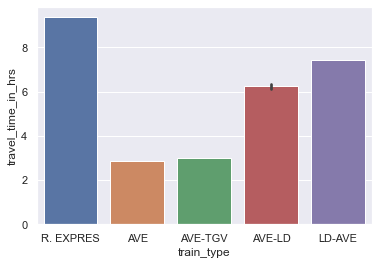

In [44]:
#write code here

sns.barplot(x=df1.train_type,y=df1.travel_time_in_hrs);

#### **Task 26: Show train_type vs price through boxplot**

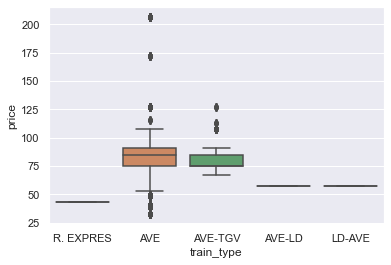

In [45]:
#write code here
sns.boxplot(x=df1.train_type,y=df1.price);

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [46]:
#write code here
df1 = df[(df.origin=='MADRID')&(df.destination=='VALENCIA')]
df1.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
5,5,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.783333
6,6,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.716667
7,7,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.700000
8,8,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.583333
9,9,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.366667


#### Task 28: Make a plot for finding out travelling hours for each train type

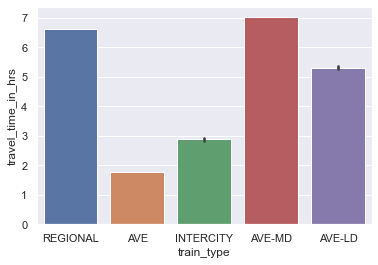

In [47]:
#write code here
sns.barplot(x=df1.train_type,y=df1.travel_time_in_hrs);

#### **Task 29: Show train_type vs price through boxplot**

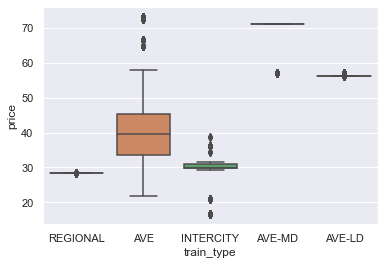

In [48]:
#write code here

sns.boxplot(x=df1.train_type,y=df1.price);


## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [49]:
#write code here
df1 = df[(df.origin=='MADRID')&(df.destination=='PONFERRADA')]
df1.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
233,233,MADRID,PONFERRADA,AVE-MD,35.75,Turista con enlace,Promo,3.883333
234,234,MADRID,PONFERRADA,AVE-LD,31.20,Turista con enlace,Promo,4.200000
235,235,MADRID,PONFERRADA,ALVIA,33.50,Turista,Promo,4.050000
236,236,MADRID,PONFERRADA,LD-MD,34.35,Turista con enlace,Promo +,6.533333
237,237,MADRID,PONFERRADA,LD,42.75,Turista con enlace,Promo +,4.200000


#### Task 31: Make a plot for finding out travelling hours for each train type

In [50]:
df1.groupby('train_type')['travel_time_in_hrs'].mean()

train_type
ALVIA        4.050000
AVE-LD       4.200000
AVE-MD       3.883333
LD           4.200000
LD-MD        5.028019
MD-LD        6.433333
TRENHOTEL    6.283333
Name: travel_time_in_hrs, dtype: float64

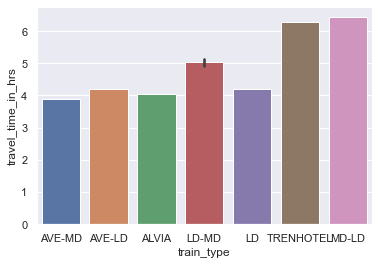

In [51]:
sns.barplot(x=df1.train_type,y=df1.travel_time_in_hrs);

#### **Task 32: Show train_type vs price through boxplot**

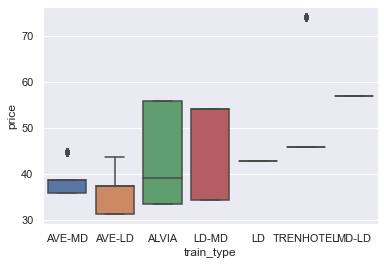

In [52]:
#write code here
sns.boxplot(x=df1.train_type,y=df1.price);

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [53]:
#write code here
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [54]:
### Creating new dataframe just to know which value is assign to given data after encoding
df_Encode=df.copy()
lab_en = LabelEncoder()
df_Encode['origin_Encode'] = lab_en.fit_transform(df_Encode.origin)
df_Encode['destination_Encode'] = lab_en.fit_transform(df_Encode.destination)
df_Encode['train_type_Encode'] = lab_en.fit_transform(df_Encode.train_type)
df_Encode['train_class_Encode'] = lab_en.fit_transform(df_Encode.train_class)
df_Encode['fare_Encode'] = lab_en.fit_transform(df_Encode.fare)


In [55]:
dict(zip(df_Encode.fare,df_Encode.fare_Encode))

{'Flexible': 1, 'Promo +': 4, 'Promo': 3, 'Adulto ida': 0, 'Mesa': 2}

**Train_type & Encoded values**
```{'MD-AVE': 11,
 'MD-LD': 12,
 'ALVIA': 0,
 'REGIONAL': 14,
 'AVE': 2,
 'INTERCITY': 6,
 'AVE-MD': 4,
 'AVE-LD': 3,
 'R. EXPRES': 13,
 'AVE-TGV': 5,
 'AV City': 1,
 'MD': 10,
 'LD-MD': 9,
 'LD': 7,
 'LD-AVE': 8,
 'TRENHOTEL': 15}```
 
 **Orgin|Destination Encoded values**
```{'PONFERRADA': 2, 'MADRID': 1, 'SEVILLA': 3, 'VALENCIA': 4, 'BARCELONA': 0}```

**TrainClass and Encoded Value**
```{'Turista con enlace': 4,
 'Turista': 2,
 'Preferente': 1,
 'Turista Plus': 3,
 'Cama Turista': 0}```
**Fare Encoded Values**
```{'Flexible': 1, 'Promo +': 4, 'Promo': 3, 'Adulto ida': 0, 'Mesa': 2}```

In [56]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [57]:
df_Encode.loc[0:4,'origin_Encode':'fare_Encode']

,origin_Encode,destination_Encode,train_type_Encode,train_class_Encode,fare_Encode
0,2,1,11,4,1
1,2,1,11,4,4
2,2,1,12,4,4
3,2,1,11,4,4
4,2,1,0,2,3


In [58]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


#### Task 34: Separate the dependant and independant variables

In [59]:
#write code here
X = df.drop(['index','price'],axis=1)
Y = df[['price']]

#### Task 35: Import test_train_split from sklearn

In [60]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [61]:
#write code here
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=100,shuffle=True)


#### Task 37: Import LinearRegression library from sklearn

In [62]:
#write code here
from sklearn.linear_model import LinearRegression

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [63]:
#write code here
lr = LinearRegression()

In [64]:
#write code here
lr.fit(X_train,Y_train)

LinearRegression()

#### Task 39: Find out the predictions using test data set.

In [65]:
#write code here
lr_predict_test = lr.predict(X_test)

#### Task 40: Find out the predictions using training data set.

In [66]:
#write code here
lr_predict_train = lr.predict(X_train)

#### Task 41: Import r2_score library form sklearn

In [67]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [68]:
#write code here
lr_r2_test= r2_score(Y_test,lr_predict_test)
print(lr_r2_test)

0.7355193856894681


#### Task 43: Find out the R2 Score for training data and print it.

In [69]:
lr_r2_train = r2_score(Y_train,lr_predict_train)
print(lr_r2_train)

0.7390796729863218


Comaparing training and testing R2 scores

In [70]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7390796729863218
R2 score for Linear Regression Testing Data is:  0.7355193856894681


#### Absolute and Squared Error

In [71]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [72]:
print('Mean Absolute Error of Training',mean_absolute_error(Y_train,lr_predict_train))
print('Mean Absolute Error of Testing',mean_absolute_error(Y_test,lr_predict_test))

Mean Absolute Error of Training 8.787897584853635
Mean Absolute Error of Testing 8.84604438351786


In [73]:
print('Mean Square Error of Training',mean_squared_error(Y_train,lr_predict_train))
print('Mean Square Error of Testing',mean_squared_error(Y_test,lr_predict_test))

Mean Square Error of Training 163.60742498303134
Mean Square Error of Testing 167.13049757085602


In [74]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


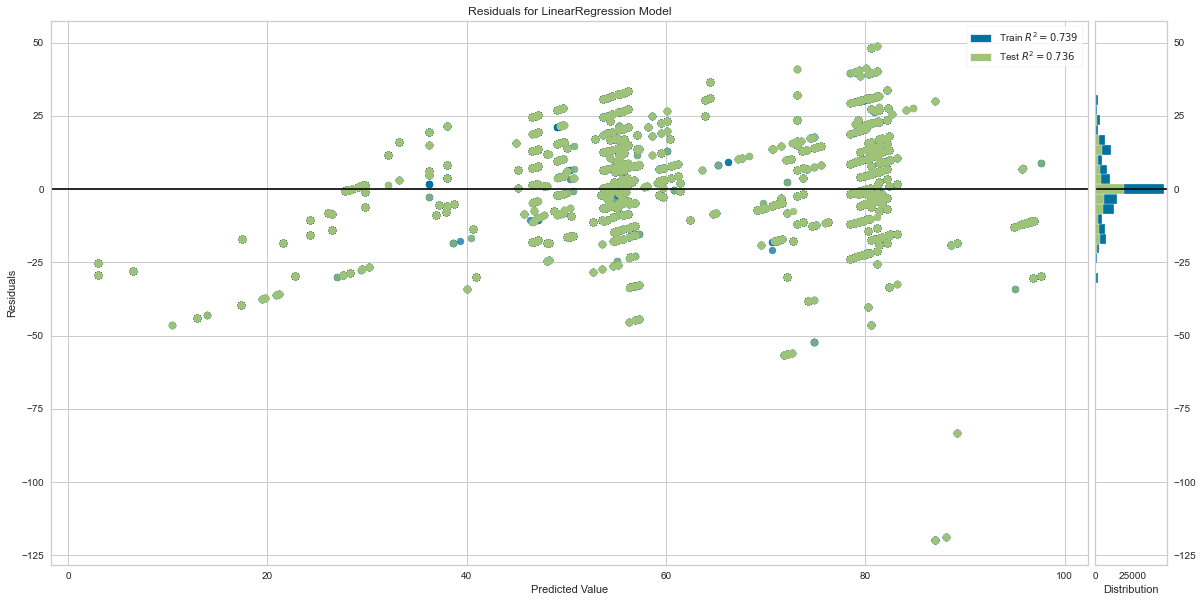

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [75]:
plt.figure(figsize=(20,10)) 
visualizer=ResidualsPlot(lr,hist=True)
visualizer.fit(X_train.values,Y_train.values)
visualizer.score(X_test.values,Y_test.values)
visualizer.poof()

# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [76]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [77]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [78]:
#write code here
X_train_poly=poly_reg.fit_transform(X_train)
X_train_poly.shape

(150686, 28)

In [79]:
X_test_poly=poly_reg.fit_transform(X_test)
X_test_poly.shape

(64580, 28)

#### Task 47: Fit the transformed features to Linear Regression

In [80]:
#write code here
poly_model = LinearRegression().fit(X_train_poly,Y_train)

#### Task 48: Find the predictions on the data set

In [81]:
#write code here
y_train_predicted=poly_model.predict(X_train_poly)

In [82]:
y_test_predicted=poly_model.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

In [83]:
#evaluating the model on training dataset
#write code here
r2_train =r2_score(Y_train,y_train_predicted)

#### Task 50: Evaluate R2 score for test data set

In [84]:
# evaluating the model on test dataset
#write code here
r2_test = r2_score(Y_test,y_test_predicted)

Comaparing training and testing R2 scores

In [85]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8396957356429526
The r2 score for testing set is:  0.8382307385757944


#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [86]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly=poly_reg.fit_transform(X_train)
    X_tst_poly = poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted=poly.predict(X_tr_poly)
    y_tst_predict = poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7390796729863218, 0.8396957356429526, 0.8674032867653814, 0.8829398430211914, 0.8881552996960944]
R2 Test [0.7355193856894678, 0.8382307385757944, 0.8686903188366883, 0.8842596262514417, 0.8894287879666745]


#### Plotting the model

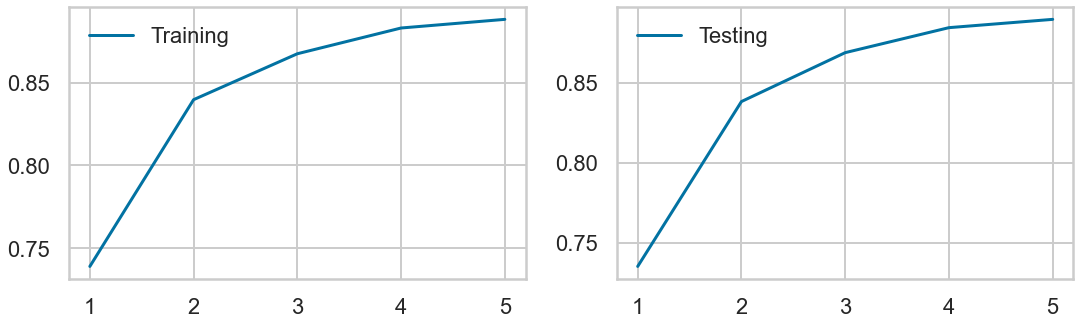

In [87]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**

Polynomial Regression with degree 3 gives the best score as we can see in the above results but when we increased the degree with 4 and above it started doing Overfitting.

#### Cross Validation for linear

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
train_score=cross_val_score(lr,X_train,Y_train,cv=10)
train_score

array([0.73373387, 0.74085924, 0.73765364, 0.73478593, 0.74470487,
       0.74213541, 0.73811961, 0.73999844, 0.74104846, 0.73720156])

In [90]:
print(train_score.mean())

0.7390241033943041


In [91]:
test_score=cross_val_score(lr,X_test,Y_test,cv=10)
test_score

array([0.73464719, 0.73978758, 0.73616078, 0.73759469, 0.72964951,
       0.72686   , 0.74542102, 0.7333838 , 0.73721879, 0.73410611])

In [92]:
print(test_score.mean())

0.7354829462432353


#### Cross Validation for Polynomial

In [93]:
train_poly_score=cross_val_score(poly_model,X_train_poly,Y_train,cv=10)
train_poly_score

array([0.84054394, 0.84207472, 0.83779238, 0.84034217, 0.83923366,
       0.84113947, 0.83975494, 0.83579903, 0.83839949, 0.84109517])

In [94]:
print(train_poly_score.mean())

0.8396174971643097


In [95]:
test_poly_score=cross_val_score(poly_model,X_test_poly,Y_test,cv=10)
test_poly_score

array([0.84106107, 0.8344599 , 0.83653213, 0.83942391, 0.83226972,
       0.83250043, 0.84580491, 0.84471815, 0.83643896, 0.83851088])

In [96]:
print(test_poly_score.mean())

0.8381720061711698


#### Recursive feature selection

In [97]:
from sklearn.feature_selection import RFE

In [98]:
lrm=LinearRegression()

In [99]:
Y.values

array([[59.5 ],
       [34.65],
       [39.95],
       ...,
       [47.3 ],
       [47.3 ],
       [52.2 ]])

In [131]:
rfe=RFE(estimator=lrm,step=1)
rfe.fit(X,np.hstack(Y.values))

RFE(estimator=LinearRegression())

In [132]:
import numpy as np
columnss=['origin','destination','train_type','price','train_class','travel_time_in_hrs']
feature_names=np.array(columnss)
feature_names

array(['origin', 'destination', 'train_type', 'price', 'train_class',
       'travel_time_in_hrs'], dtype='<U18')

In [133]:
rfe.ranking_

array([1, 1, 3, 4, 2, 1])

In [134]:
rfe.support_

array([ True,  True, False, False, False,  True])

In [135]:
list(feature_names[rfe.support_])

['origin', 'destination', 'travel_time_in_hrs']

In [136]:
rfe.n_features_

3

In [137]:
Xtrain_new=X_train[list(feature_names[rfe.support_])]
Xtest_new=X_test[list(feature_names[rfe.support_])]

In [138]:
print(Xtrain_new.shape)
print(Xtest_new.shape)

(150686, 3)
(64580, 3)


In [139]:
lm2=LinearRegression()
lm2.fit(Xtrain_new,Y_train)

LinearRegression()

In [140]:
predict=lm2.predict(Xtest_new)

In [141]:
r2_score(Y_test,predict)

0.6806850348865641